<center>
    <img src="https://i.ibb.co.com/m5hwhf2/HDC-Anca.png" width="300">
    <h1><b>Youtube Views Prediction - by Heptad Data Collector</b></h1>
</center>

**Members of Heptad Data Collector**

1. Farah Fitria Sari
2. Aditya Fajri Melinianto
3. Apri Ansyah
5. Oktafina Pingkan Purwanto
6. Pancaran Ratna Mustika
7. Ryan Fajar
8. Tiara Lailatul Nikmah

- **Tools**

![Made withJupyter](https://img.shields.io/badge/Made%20with-Jupyter-orange?style=for-the-badge&logo=Jupyter)
![Featuring](https://img.shields.io/badge/Using-Python-blue?style=for-the-badge&logo=python)

- **Dataset**

Daily statistics for trending YouTube videos: [Trending YouTube Video Statistics](https://www.kaggle.com/datasets/datasnaek/youtube-new "Trending YouTube Video Statistics")

- **Find us on GitHub**

Our Repository: [Youtube Views Prediction](https://github.com/heptaddc/Youtube-Views-Prediction "Youtube Views Prediction")

# Youtube Views Prediction

## Definisi masing-masing kolom

<center>
    <img src="https://logowik.com/content/uploads/images/899_youtube_2017logo.jpg" width="600">
</center>

<br>

| No | Nama Kolom | Definisi |
| :- | -: | :-: |
| 1 | trending_date | tanggal ketika video trending
| 2 | title | judul video
| 3 | channel_title | nama channel
| 4 | category_id | kategori video dalam label encoding
| 5 | publish_time | waktu publish video
| 6 | tags | tag yang digunakan pada video
| 7 | views | jumlah views video
| 8 | likes | jumlah likes video
| 9 | dislikes | jumlah dislikes video
| 10 | comment_count | jumlah komentar pada video
| 11 | comments_disabled | apakah status komentar dinonaktifkan pada video
| 12 | ratings_disabled | apakah rating dinonaktifkan pada video
| 13 | video_error_or_removed | apakah video error atau sudah dihapus saat ini
| 14 | description | deskripsi video
| 15 | No_tags | jumlah tags yang digunakan
| 16 | desc_len | panjang kata deskripsi video
| 17 | len_title | panjang kata judul video
| 18 | publish_date | tanggal publish video


## Goals

Membangun model untuk memprediksi penayangan video berdasarkan angka statistik dan atribut lainnya.


## Main Instruction
1. Melakukan Exploratory Data Analysis, lalu membuat beberapa visualisasi untuk mendeskripsikan data.
2. Melakukan Data Pre-processing.
3. Memisahkan data antara yang training dan testing dengan porsi tertentu.
4. Membuat model dengan menggunakan bantuan hyperparameter tune, lalu memilih model yang memiliki nilai evaluasi terbaik
5. Melakukan testing model machine learning yang sudah dipilih


# **1. Exploratory Data Analysis (EDA) & Insight**

## Import Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
import statsmodels.stats.proportion as sp

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline

import warnings
warnings.filterwarnings("ignore")

## Import Dataset

In [3]:
df = pd.read_excel('youtube_statistics.xlsx')
df.sample(10)

trending_date                                              title  \
926      2017-11-18  स्पेशल रिपोर्ट : कोल्हापूर : कोल्हापूरच्या बेप...   
3669     2017-12-03  Muddha Mandaram - Episode 944  - December 2, 2...   
20034    2018-03-07  Board Exams Ki Taiyari | TSP's Rabish Ki Repor...   
26388    2018-04-18  FilterCopy | Is SRK Overrated? | SRK Fans Vs S...   
33554    2018-05-27  Selfish Song Video - Race 3 | Salman Khan, Bob...   
5037     2017-12-11  Gujarat 1st Phase Voting LIVE: Understanding T...   
10514    2018-01-09  Kalyanam Conditions Apply | Episode 6 - ‘Phone...   
20091    2018-03-07  పెళ్లి చేసుకోమని అడిగినందుకు ప్రియురాలి హత్య.....   
31964    2018-05-18         Sriramulu smashes a new bomb in BJP Office   
14146    2018-01-31                Kanpur Waale Tripathi Ji Ki Ladki 3   

                    channel_title  category_id publish_time  \
926                     Abp Majha           25     14:27:26   
3669                  zeetvtelugu           24     01:32:15   
20034            The Screen Patti           24     16:53:55   
26388                  FilterCopy           23     06:30:33   
33554               Tips Official           10     06:29:52   
5037                      Aaj Tak           25     05:55:56   
10514          Radio Mirchi Tamil           24     05:32:07   
20091                    TV5 News           25     14:13:19   
31964  Btv Kannada Ɩ ಬಿಟಿವಿ ಕನ್ನಡ           25     07:24:10   
14146                Irahul Vohra           23     14:49:55   

                                                    tags     views   likes  \
926    abp majha|"news"|"marathi news"|"स्पेशल रिपोर्...     45772     234   
3669   zee telugu|"Muddha Mandaram"|"full episode"|"t...    114073     197   
20034  ndtv|"ndtv india"|"rabish ki report"|"episode4...   1545446   65954   
26388  SRK|"King khan"|"rahul"|"best of srk"|"romance...    397391   19985   
33554  race 3 trailer|"salman khan"|"jacqueline ferna...  10169177  185859   
5037   aajtak|"aaj tak"|"aaj tak videos"|"aajtak news...    483007    1630   
10514  conditions apply|"mirchi senthil"|"sreeja"|"ta...    728744   28944   
20091  TV5|"TV5 Live Channel"|"live telugu tv"|"TV5 L...    128836     305   
31964  #BtvNewsLive|"#BtvKannada"|"Sriramulu smashes ...    205734     930   
14146  irahul vohra|"irahul vohra vines"|"irahul vohr...     84925    5276   

       dislikes  comment_count  comments_disabled  ratings_disabled  \
926          22             31              False             False   
3669         24             12              False             False   
20034      2256           4837              False             False   
26388      2974           4729              False             False   
33554     81383          36549              False             False   
5037        494            141              False             False   
10514       490           1635              False             False   
20091        76             42              False             False   
31964       249            135              False             False   
14146       160            304              False             False   

       video_error_or_removed  \
926                     False   
3669                    False   
20034                   False   
26388                   False   
33554                   False   
5037                    False   
10514                   False   
20091                   False   
31964                   False   
14146                   False   

                                             description  No_tags  desc_len  \
926    सांगली पोलिसांच्या क्रूरकृत्यांचा भेसूर चेहरा ...        5       597   
3669   http://www.ozee.com/shows/muddha-mandaram - Cl...       10      1299   
20034  Youthon ka wafadaar, world famous patrakaar Ra...       58      2232   
26388  Love him or hate him you cannot IGNORE him! \n...       40       752   
33554  Atif Aslam & Iulia Vantur team up with Vishal ...       29      3332   
5037   From our in

## Data Understanding

In [4]:
df.info()
df.nunique().sort_values(ascending=False)
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36791 entries, 0 to 36790
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   trending_date           36791 non-null  object        
 1   title                   36791 non-null  object        
 2   channel_title           36791 non-null  object        
 3   category_id             36791 non-null  int64         
 4   publish_time            36791 non-null  object        
 5   tags                    36791 non-null  object        
 6   views                   36791 non-null  int64         
 7   likes                   36791 non-null  int64         
 8   dislikes                36791 non-null  int64         
 9   comment_count           36791 non-null  int64         
 10  comments_disabled       36791 non-null  bool          
 11  ratings_disabled        36791 non-null  bool          
 12  video_error_or_removed  36791 non-null  bool  

category_id         views         likes      dislikes  comment_count  \
count  36791.000000  3.679100e+04  3.679100e+04  3.679100e+04   36791.000000   
mean      21.552173  1.071490e+06  2.745069e+04  1.685363e+03    2714.022043   
min        1.000000  4.024000e+03  0.000000e+00  0.000000e+00       0.000000   
25%       23.000000  1.256040e+05  8.790000e+02  1.090000e+02      83.000000   
50%       24.000000  3.078360e+05  3.126000e+03  3.310000e+02     336.000000   
75%       24.000000  8.066315e+05  1.409500e+04  1.032000e+03    1314.500000   
max       43.000000  1.254322e+08  2.912710e+06  1.545017e+06  827755.000000   
std        6.586716  3.207149e+06  9.783129e+04  1.619732e+04   14978.114328   

            No_tags      desc_len     len_title                   publish_date  
count  36791.000000  36791.000000  36791.000000                          36791  
mean      18.938463    923.079123     70.609361  2018-02-24 11:20:36.334973440  
min        1.000000      3.000000      5.000000            2017-05-27 00:00:00  
25%       12.000000    368.000000     53.000000            2017-12-31 00:00:00  
50%       19.000000    677.000000     74.000000            2018-02-23 00:00:00  
75%       25.000000   1237.000000     91.000000            2018-04-23 00:00:00  
max       72.000000   5136.000000    100.000000            2018-06-13 00:00:00  
std        9.843531    815.038867     22.409174                            NaN

## A. Mengecek NA pada dataset

In [5]:
#Mengecek cell kosong
df.isna().sum().sort_values(ascending=False)

description               45
trending_date              0
title                      0
len_title                  0
desc_len                   0
No_tags                    0
video_error_or_removed     0
ratings_disabled           0
comments_disabled          0
comment_count              0
dislikes                   0
likes                      0
views                      0
tags                       0
publish_time               0
category_id                0
channel_title              0
publish_date               0
dtype: int64

## B. Mengecek data duplikat pada dataset

In [6]:
#Mengecek cell duplicate
df.duplicated().value_counts()

False    32562
True      4229
Name: count, dtype: int64

Ada beberapa catatan kecil mengenai format dataset ini

1. Kolom trending_date seharusnya datetime64, bukan object
2. Sebelum dipisah menjadi beberapa fitur baru, kolom publish_time seharusnya datetime64, bukan object
3. Ratings_disabled, comments_disabled, video_error_or_removed memiliki rasio nilai True yang sangat sedikit dibandingkan nilai False
4. Pada kolom tag, value ‘[none]’ merupakan yang terbesar jumlahnya
5. Kolom tag, title, dan description memiliki cell value dengan variasi yang tinggi

## C. Univariate Analysis

### 1. Boxplot

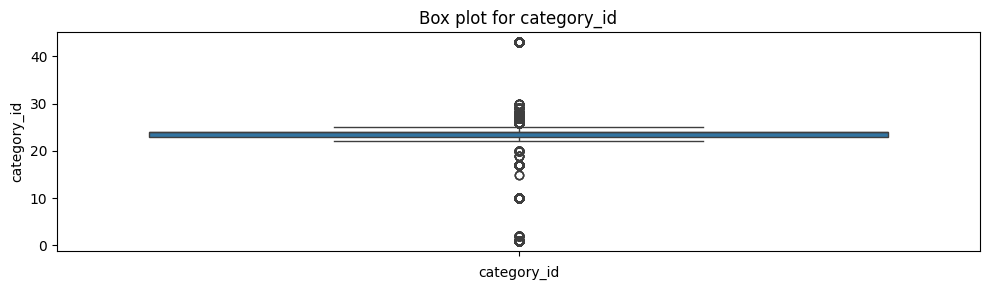

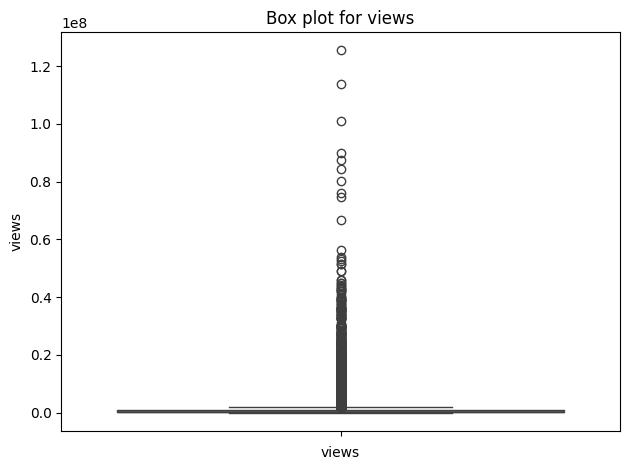

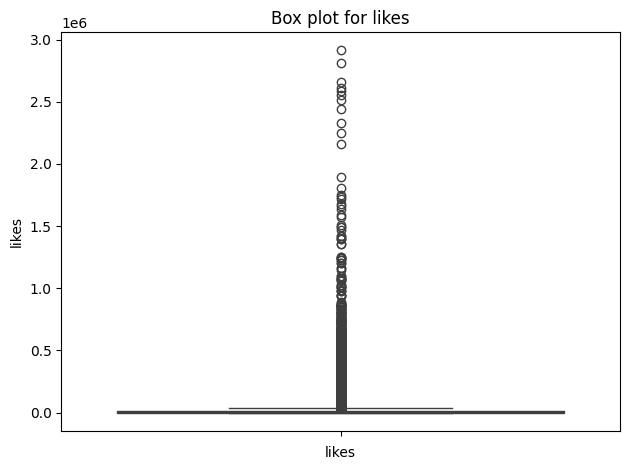

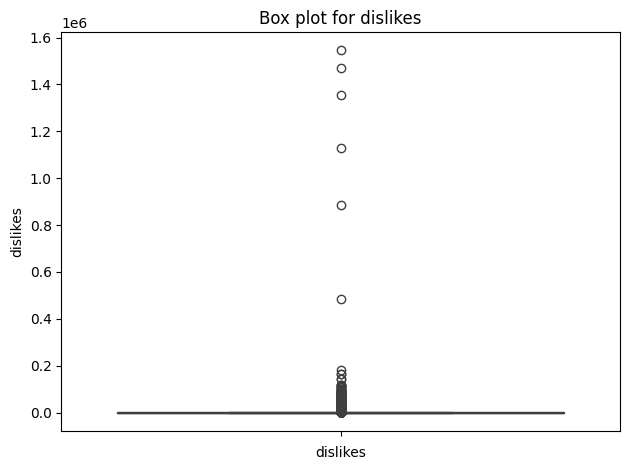

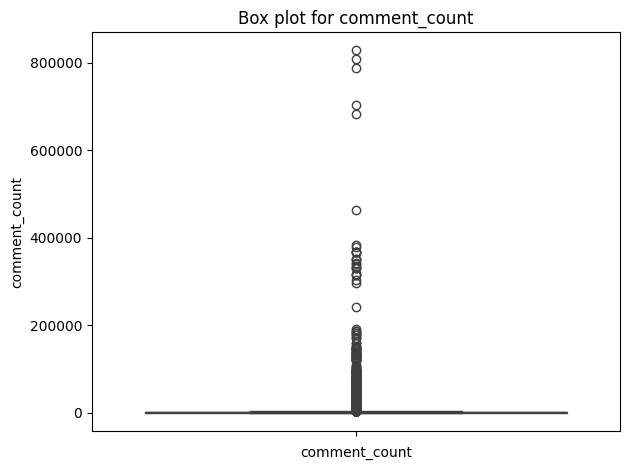

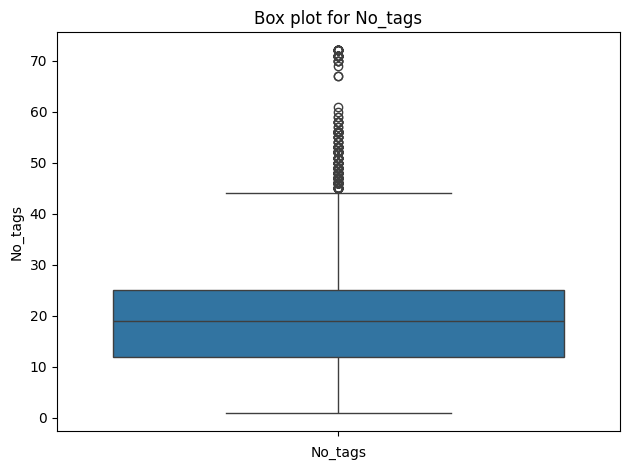

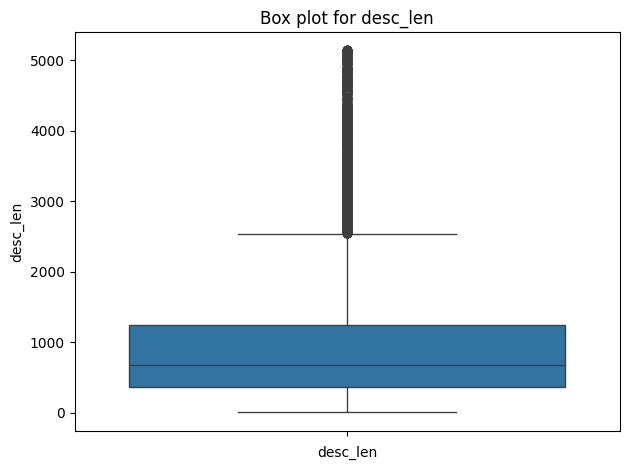

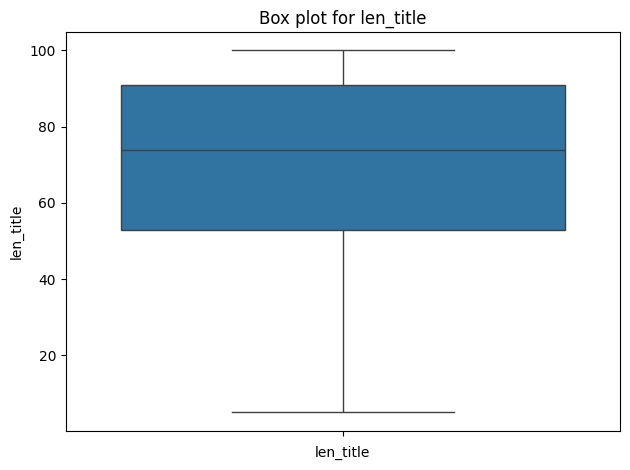

In [7]:
newdf = df.select_dtypes(include=['number'])
newdf.describe()
plt.figure(figsize=(10, 3))
for column in newdf:
    sns.boxplot(y=newdf[column])
    plt.title(f'Box plot for {column}')
    plt.xlabel(column)
    plt.tight_layout()
    plt.show()

### 2. Histogram

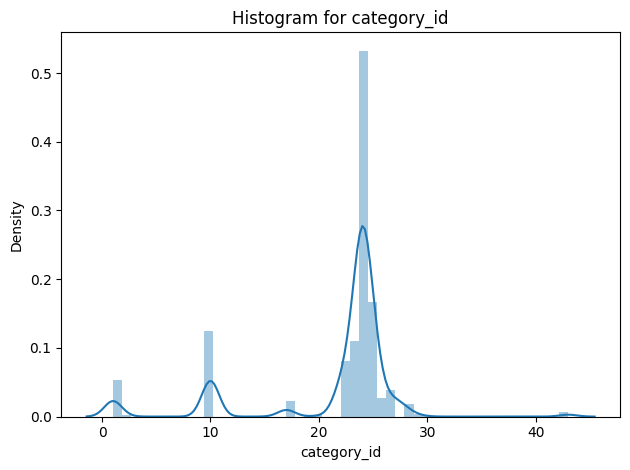

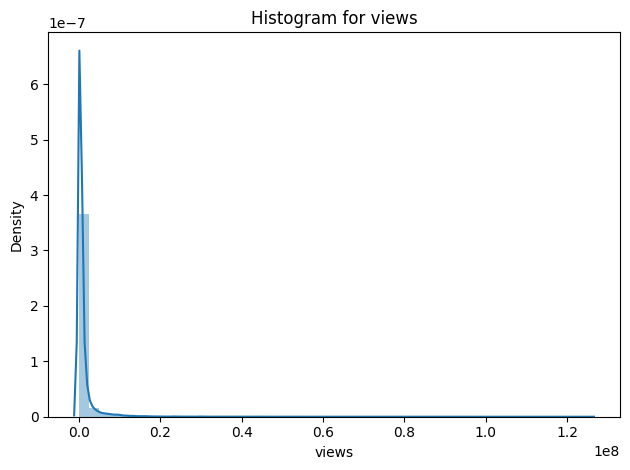

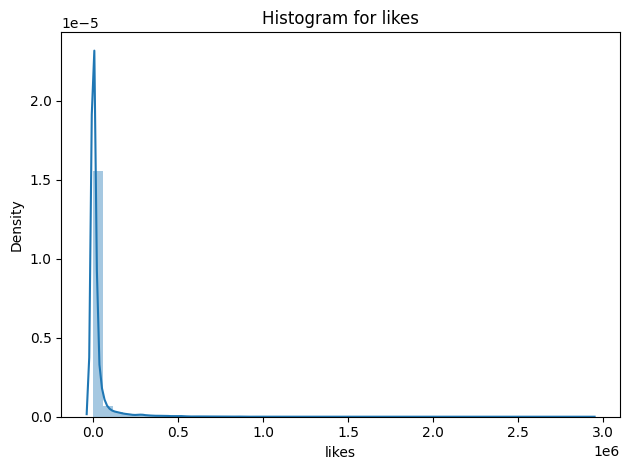

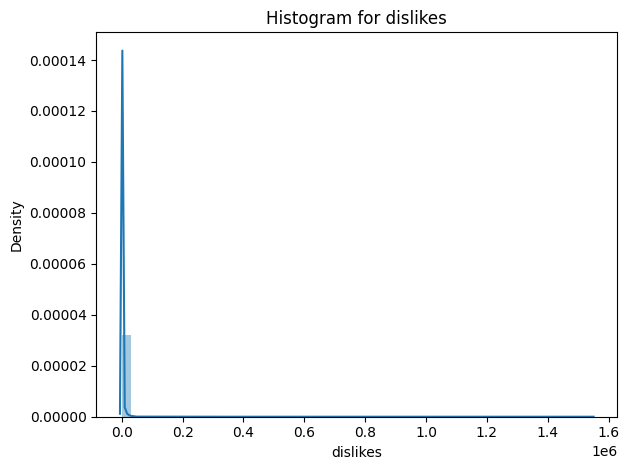

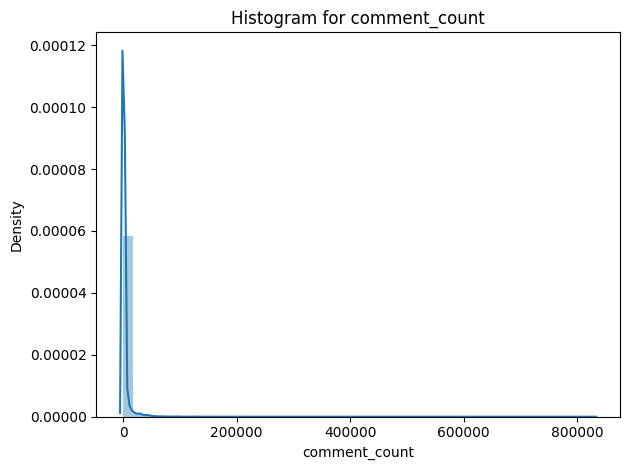

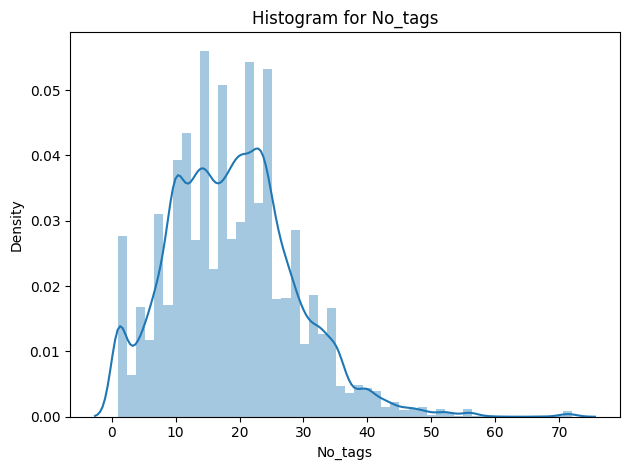

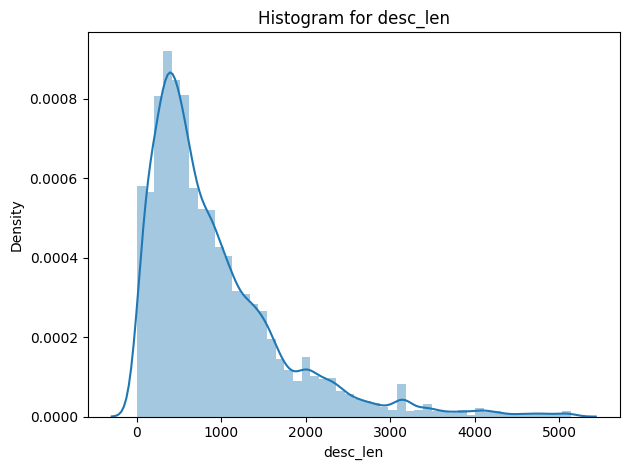

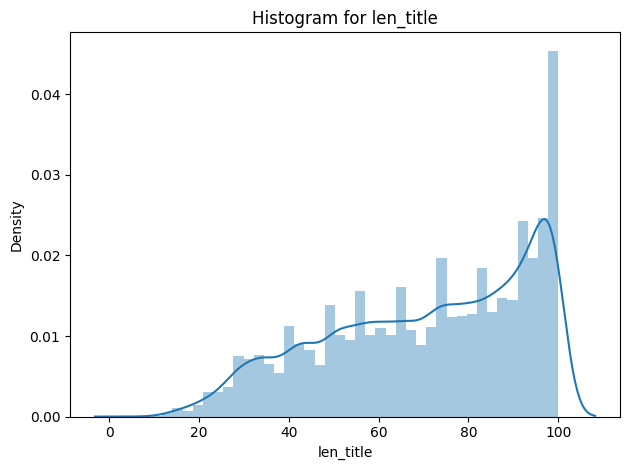

In [8]:
for column in newdf:
    sns.distplot(x=newdf[column])
    plt.title(f'Histogram for {column}')
    plt.xlabel(column)
    plt.tight_layout()
    plt.show()

### 3. Value Counts Kategorikal

#### a. Channel Title

<Axes: xlabel='channel_title'>

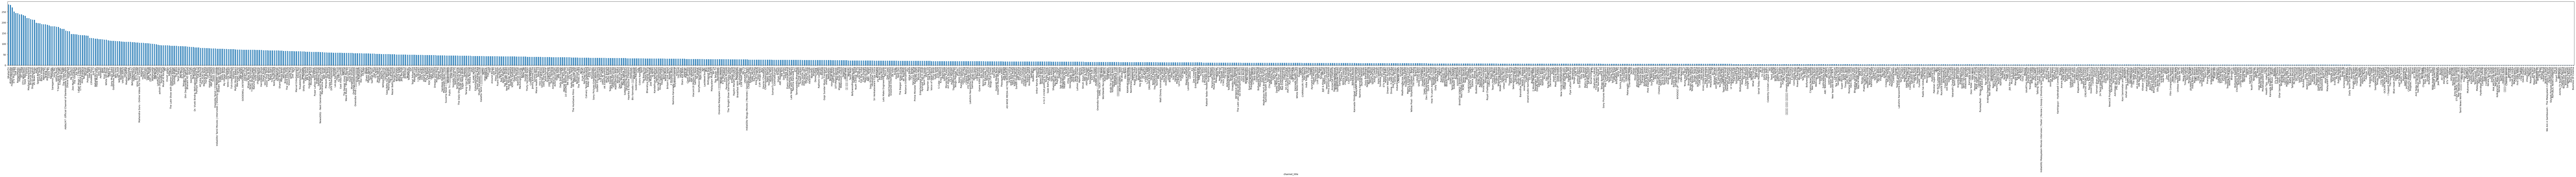

In [9]:
df['channel_title'].value_counts().sort_values(ascending=False).plot(kind="bar",figsize=(200,5))

#### b. Boolean Columns (ratings_disabled, comments_disabled, video_error_or_removed)

<Axes: xlabel='ratings_disabled'>

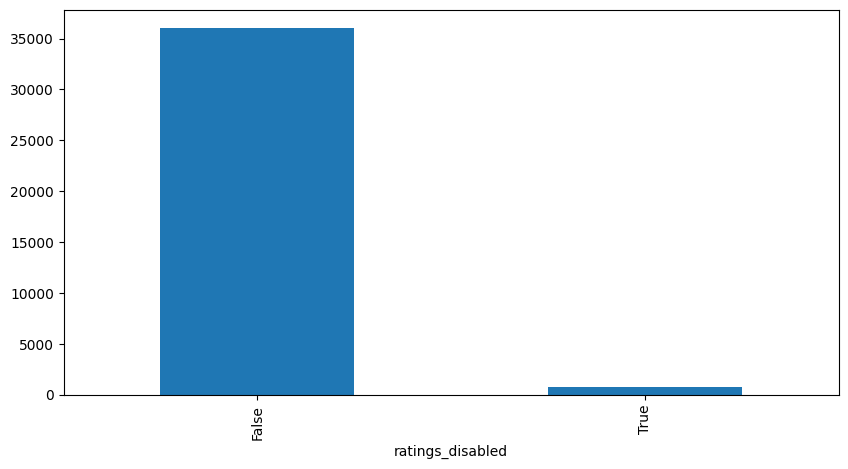

In [10]:
df['ratings_disabled'].value_counts().sort_values(ascending=False).plot(kind="bar",figsize=(10,5))

<Axes: xlabel='comments_disabled'>

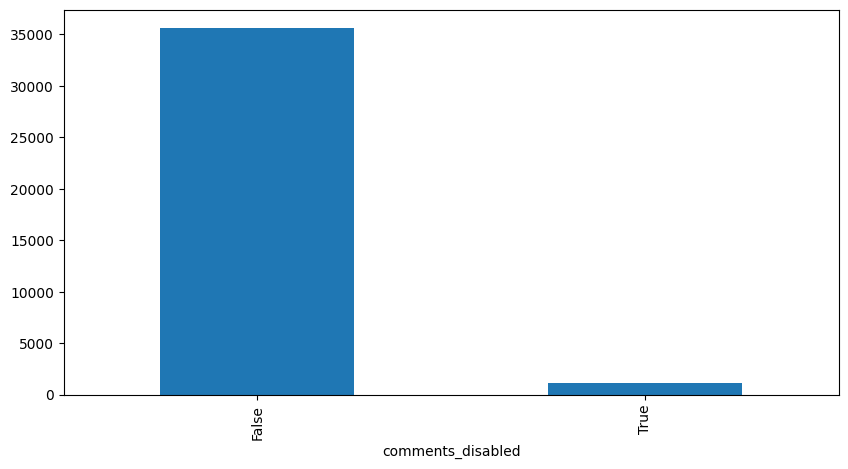

In [11]:
df['comments_disabled'].value_counts().sort_values(ascending=False).plot(kind="bar",figsize=(10,5))

<Axes: xlabel='video_error_or_removed'>

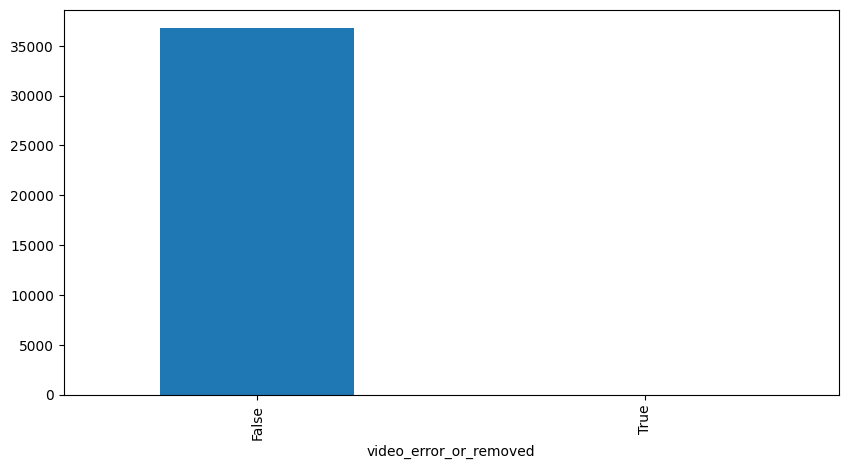

In [12]:
df['video_error_or_removed'].value_counts().sort_values(ascending=False).plot(kind="bar",figsize=(10,5))

In [13]:
#Mengubah boolean menjadi int untuk dicek korelasinya
df['ratings_disabled'] = df['ratings_disabled'].replace({False: 0, True: 1})
df['comments_disabled'] = df['comments_disabled'].replace({False: 0, True: 1})
df['video_error_or_removed'] = df['video_error_or_removed'].replace({False: 0, True: 1})

#### c. Category_id

<Axes: xlabel='category_id'>

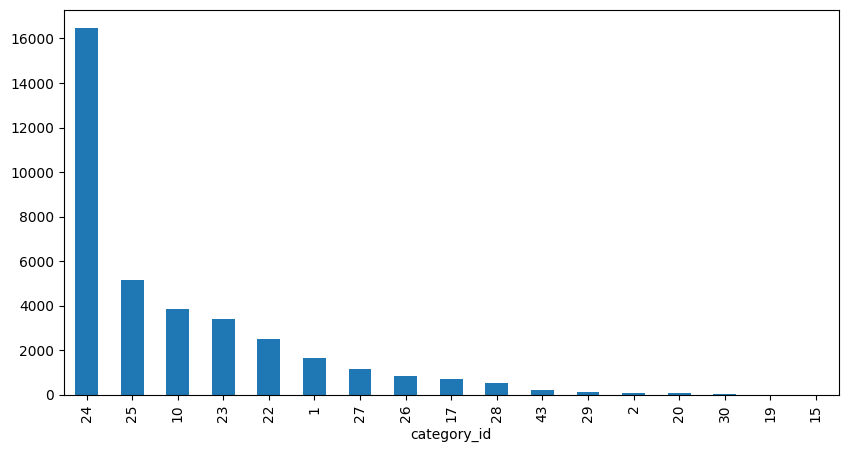

In [14]:
df['category_id'].value_counts().plot(kind="bar",figsize=(10,5))

## D. Multivariate Analysis

### 1. Table Correlation

In [15]:
newdf.corr()

category_id     views     likes  dislikes  comment_count  \
category_id       1.000000 -0.183014 -0.127137 -0.042272      -0.035696   
views            -0.183014  1.000000  0.850073  0.543310       0.674151   
likes            -0.127137  0.850073  1.000000  0.494518       0.780445   
dislikes         -0.042272  0.543310  0.494518  1.000000       0.708100   
comment_count    -0.035696  0.674151  0.780445  0.708100       1.000000   
No_tags          -0.000233  0.055327  0.019600  0.033725       0.020227   
desc_len         -0.148119  0.122142  0.065086  0.035031       0.031604   
len_title        -0.163273 -0.051559 -0.170257 -0.030300      -0.119092   

                No_tags  desc_len  len_title  
category_id   -0.000233 -0.148119  -0.163273  
views          0.055327  0.122142  -0.051559  
likes          0.019600  0.065086  -0.170257  
dislikes       0.033725  0.035031  -0.030300  
comment_count  0.020227  0.031604  -0.119092  
No_tags        1.000000  0.177760   0.041871  
desc_len       0.177760  1.000000   0.159658  
len_title      0.041871  0.159658   1.000000

### 2. Heatmap

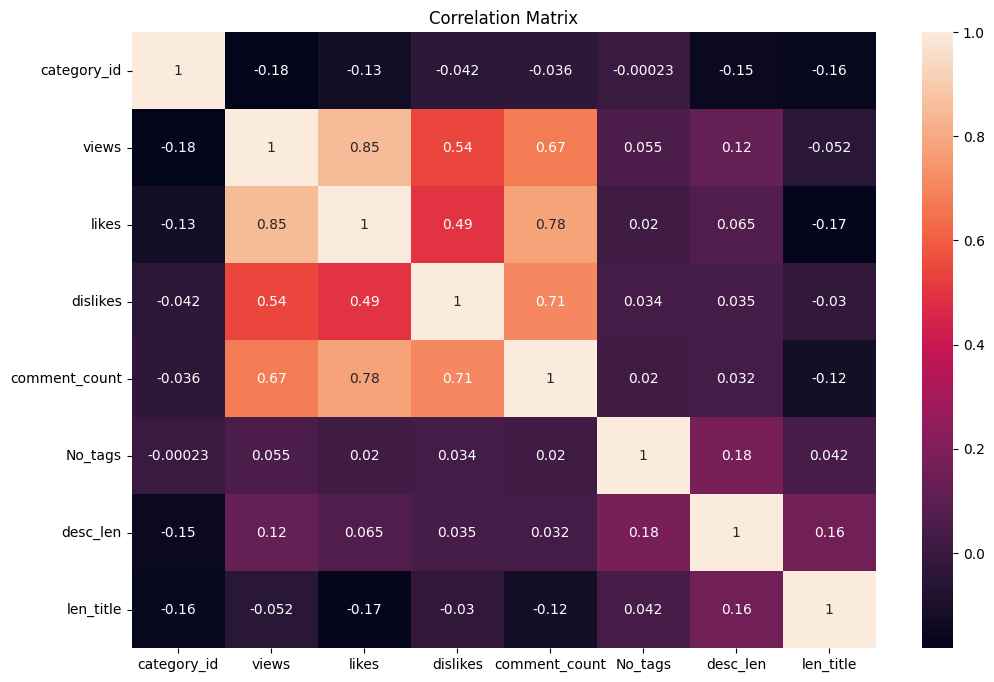

In [16]:
plt.figure(figsize=(12, 8))
sns.heatmap(newdf.corr(), annot=True)
plt.title('Correlation Matrix')
plt.show()

### 3. Pairplot

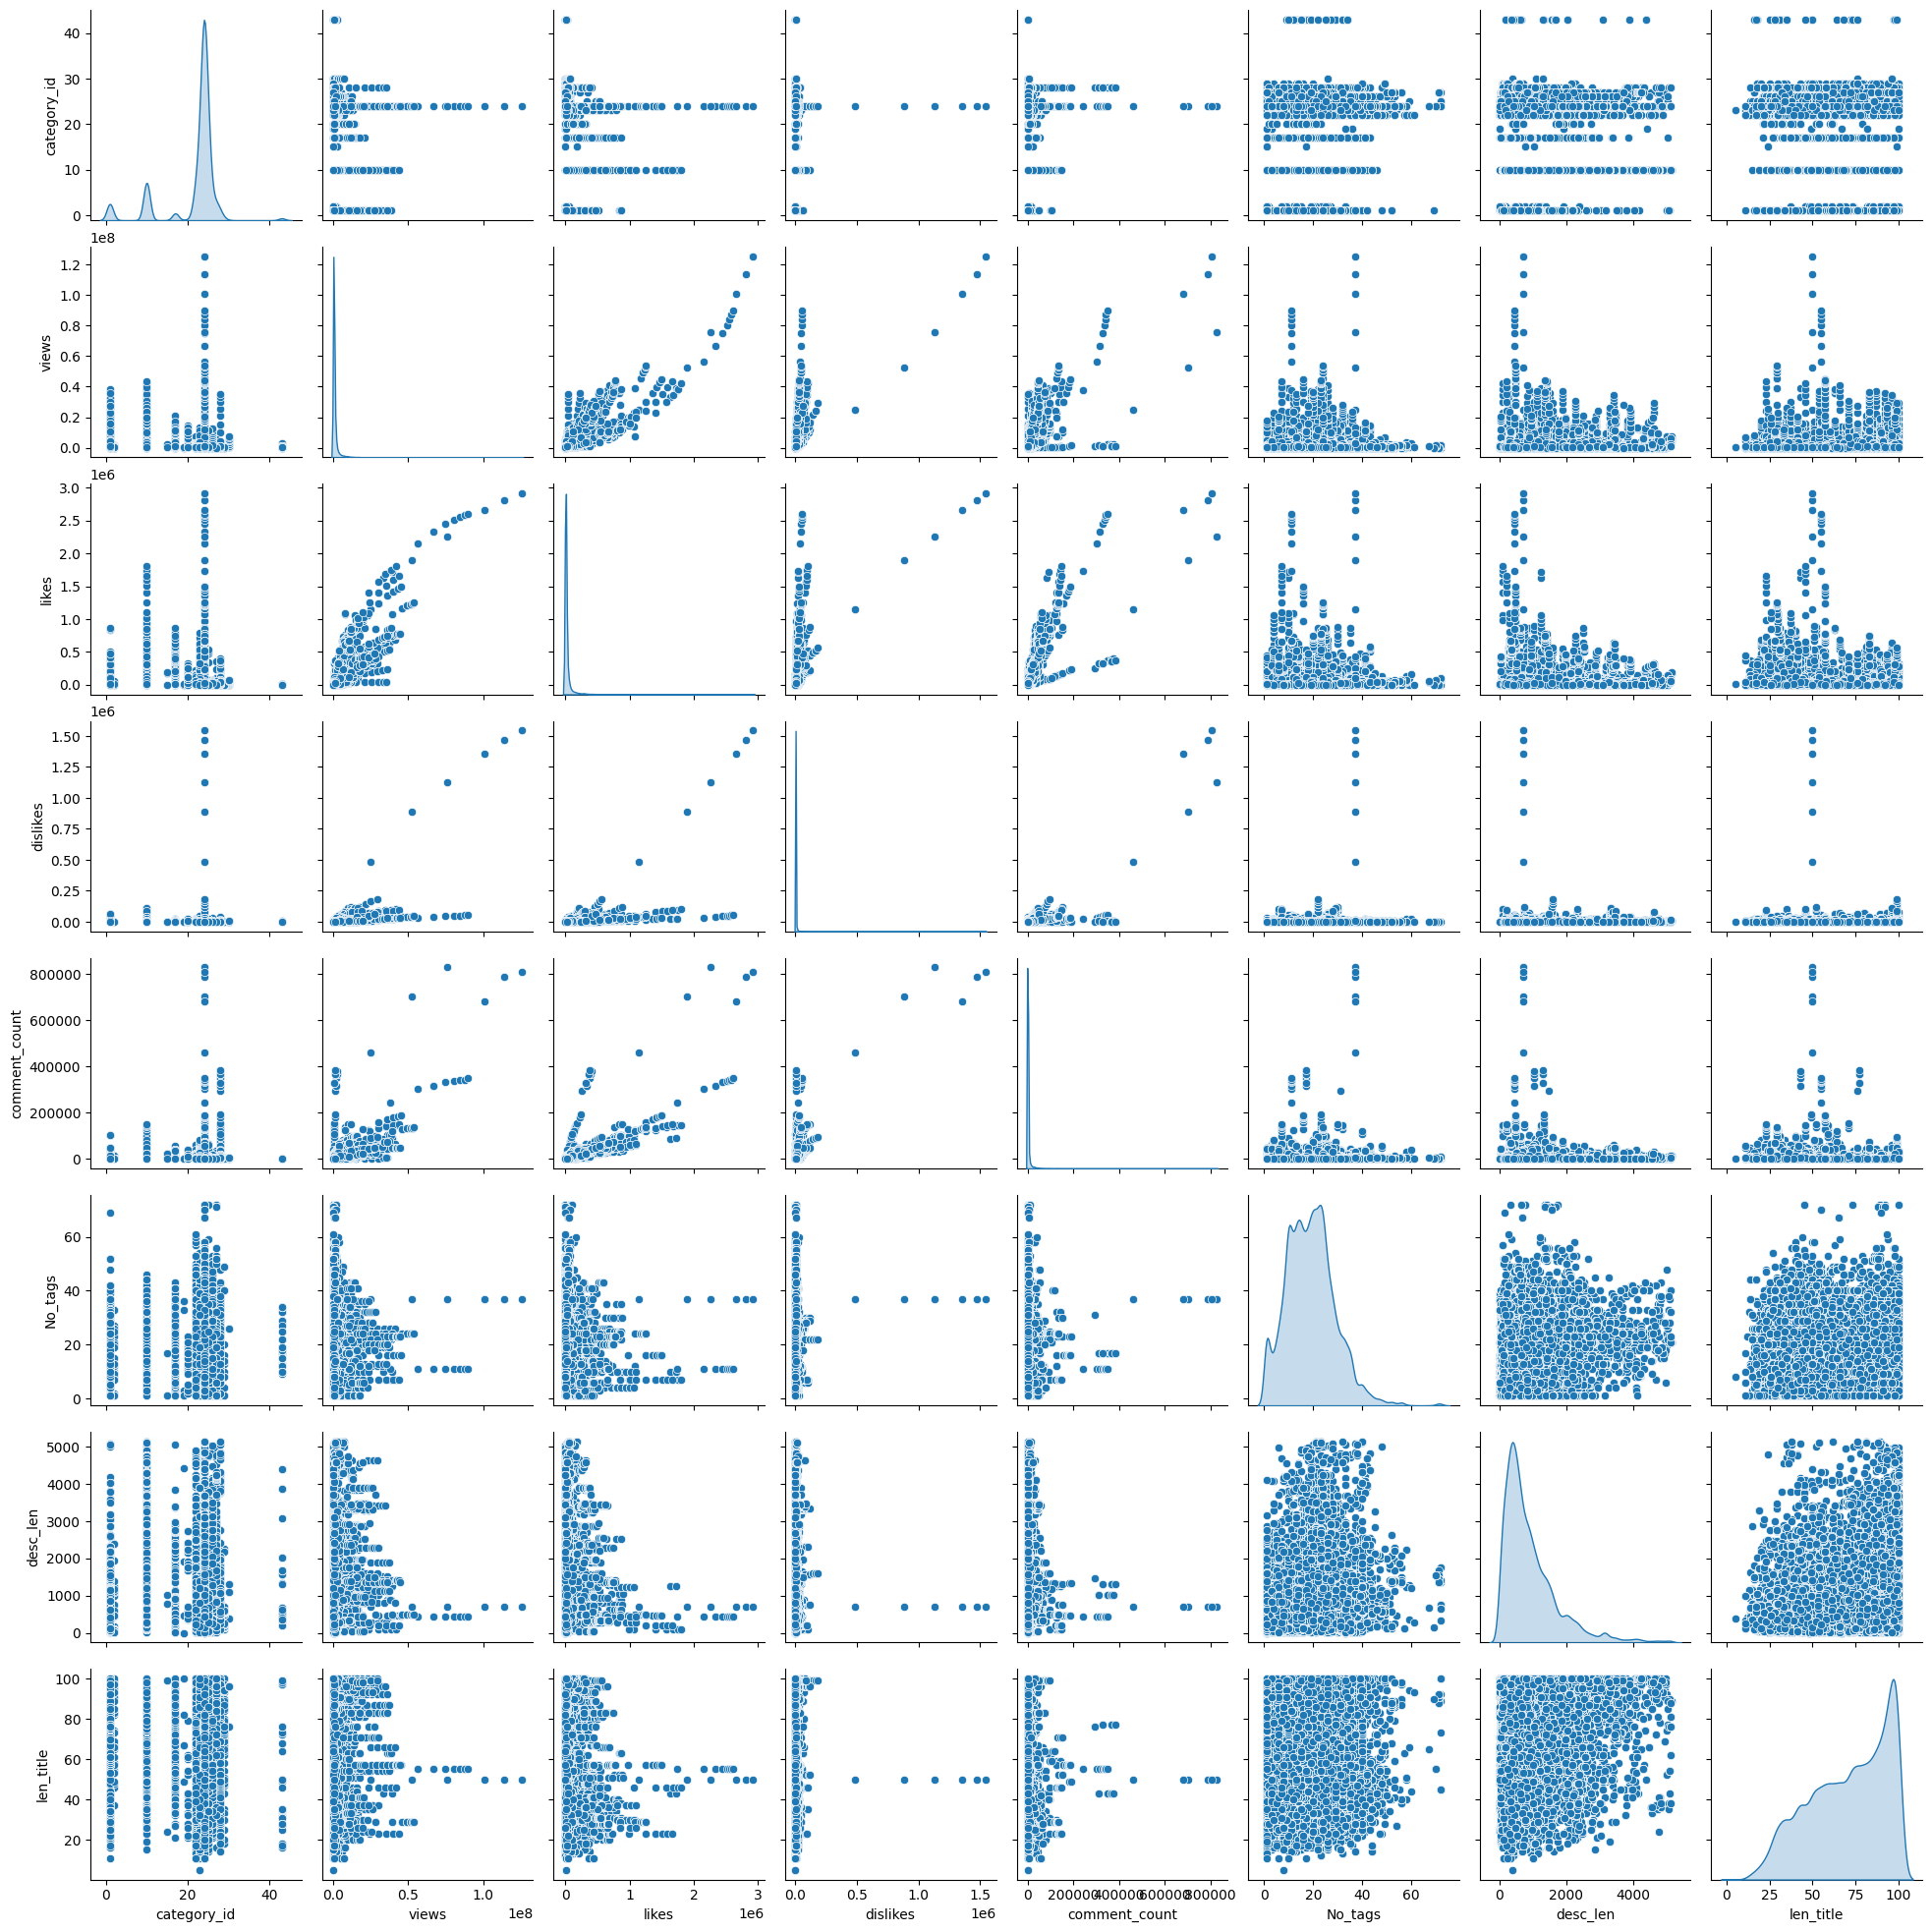

In [17]:
#Pairplot
sns.pairplot(newdf, diag_kind='kde')

### 4. Categorical - Bar Chart

Karena kolom target adalah views, maka bar chart berikut memiliki sumbu-y kolom views dan sumbu-x kolom kategorikal.

#### a. Channel Title

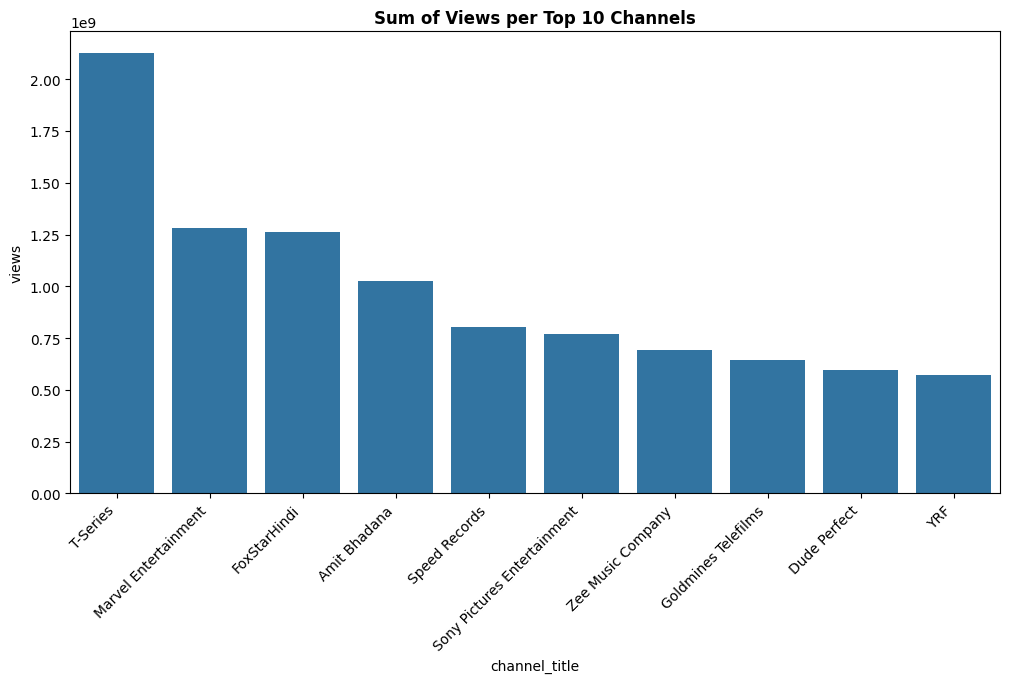

In [18]:
# Calculate the sum of views per channel and select the top 10 channels
top_channels = df.groupby('channel_title')['views'].sum().nlargest(10).reset_index()

# Plot the filtered data
plt.figure(figsize=(12, 6))  # Adjust figsize as needed
sns.barplot(x="channel_title", y="views", data=top_channels, estimator=sum).set_title('Sum of Views per Top 10 Channels', weight='bold')
plt.xticks(rotation=45, ha='right')  # Rotate x labels if needed for better readability
plt.show()

#### b. Boolean Columns (ratings_disabled, comments_disabled, video_error_or_removed)

Text(0.5, 1.0, "Sum of Comments-Disabled Videos' Views")

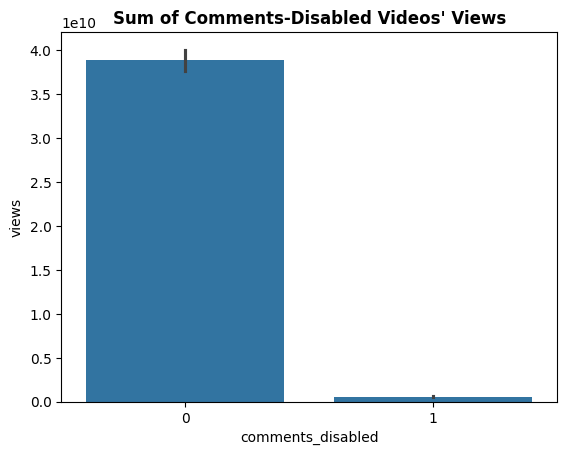

In [19]:
sns.barplot(x="comments_disabled", y="views", data=df,estimator=sum).set_title("Sum of Comments-Disabled Videos' Views", weight="bold")

Text(0.5, 1.0, "Sum of Ratings-Disabled Videos' Views")

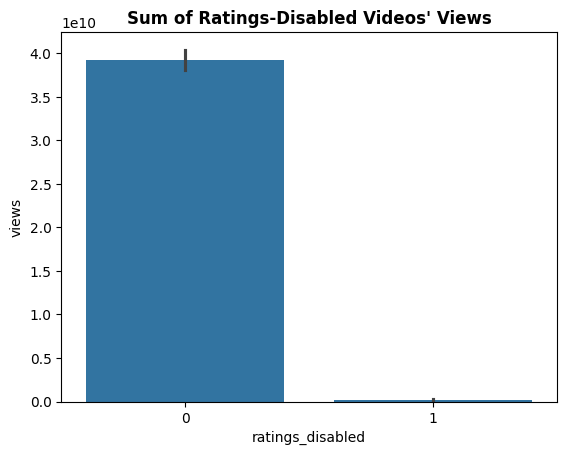

In [20]:
sns.barplot(x="ratings_disabled", y="views", data=df,estimator=sum).set_title("Sum of Ratings-Disabled Videos' Views", weight="bold")

Text(0.5, 1.0, 'Sum of Views Video Error/Removed')

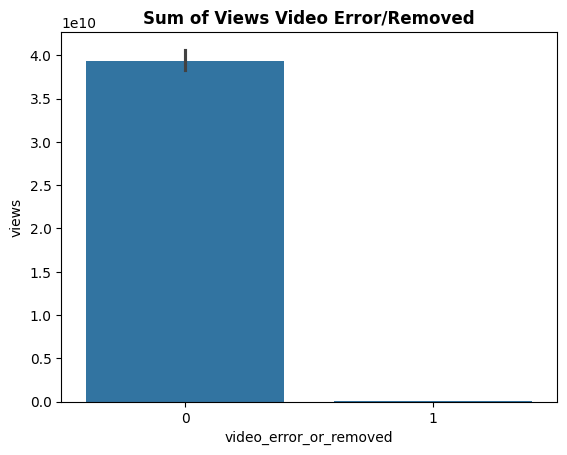

In [21]:
sns.barplot(x="video_error_or_removed", y="views", data=df,estimator=sum).set_title('Sum of Views Video Error/Removed', weight='bold')

#### c. Category_id

Text(0.5, 1.0, 'Sum of Views per Category_id')

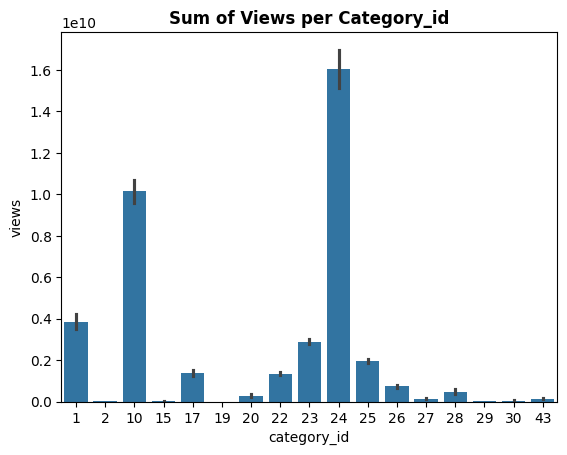

In [22]:
sns.barplot(x="category_id", y="views", data=df,estimator=sum).set_title('Sum of Views per Category_id', weight='bold')

#### d. Len_title

Text(0.5, 1.0, 'Sum of Views per len_title')

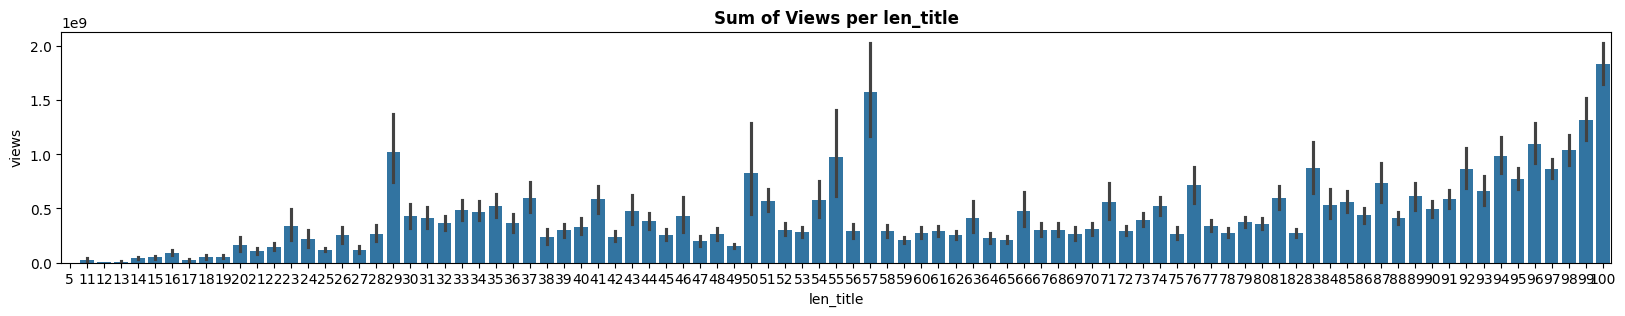

In [23]:
plt.figure(figsize=(20, 3))
sns.barplot(x="len_title", y="views", data=df,estimator=sum).set_title('Sum of Views per len_title', weight='bold')

#### e. No_tags

Text(0.5, 1.0, 'Sum of Views per Number of tags')

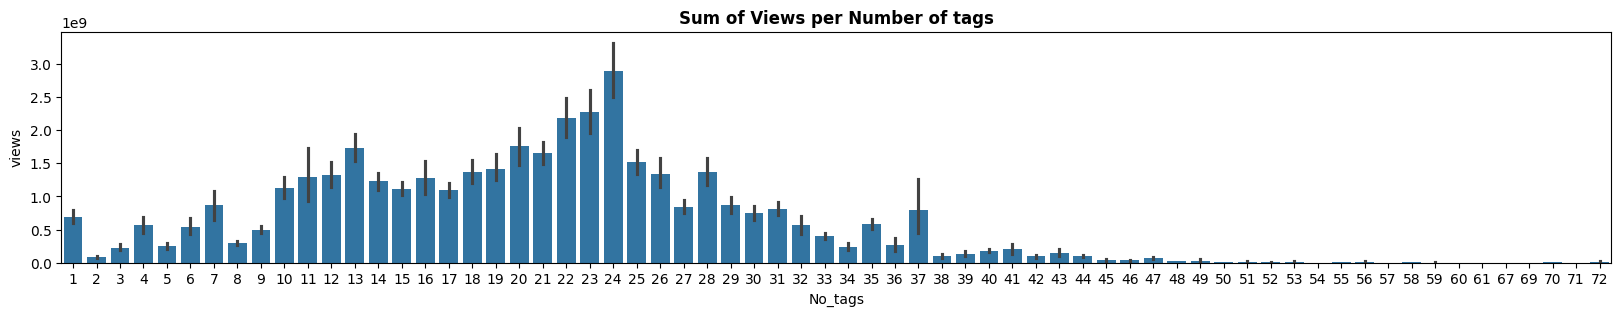

In [24]:
plt.figure(figsize=(20, 3))
sns.barplot(x="No_tags", y="views", data=df,estimator=sum).set_title('Sum of Views per Number of tags', weight='bold')

#### f. Desc_len

Text(0.5, 1.0, 'Sum of Views per Description length')

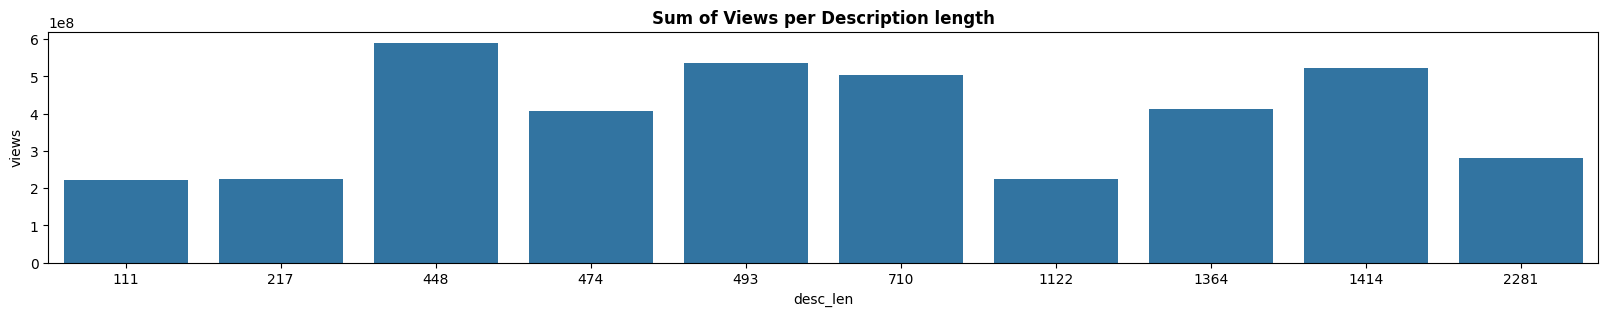

In [25]:
top_desc = df.groupby('desc_len')['views'].sum().nlargest(10).reset_index()

plt.figure(figsize=(20, 3))
sns.barplot(x="desc_len", y="views", data=top_desc,estimator=sum).set_title('Sum of Views per Description length', weight='bold')

#### Insight

1. Dari channel dan title dapat dilihat bahwa dataset ini mengambil setting di youtube India.
2. Kolom view, likes, dislikes, comment_count, No_tags, dan desc_len memiliki jenis distribusi positive skew. Ini berarti hanya ada beberapa video India di youtube yang bisa memiliki total jumlah view, likes, dislikes, komentar, tag, dan panjang description yang tinggi. Hal ini mirip dengan kenyataan secara global, bahwa hanya ada beberapa video saja yang viral sampai bisa punya view, likes, dll yang tinggi.
3. Kolom category_id memiliki jenis distribusi normal. Ini berarti kuantitas distribusi pada nilai tengah category_id adalah yang tertinggi dibanding nilai minimum ataupun maksimumnya. Ini dapat dilihat pada bar chart category_id, kategori no. 24 memiliki kemunculan dan views terbanyak.
4. Kolom len_title memiliki jenis distribusi negative_skew. Ini berarti judul video di youtube India lebih umum memiliki jumlah karakter yang banyak dibanding karakter yang sedikit. Butuh data lebih lanjut lagi untuk membandingkan dengan keadaan global apakah keadaan ini sama atau tidak.
5. Kolom likes, comment_count, dan dislikes memiliki korelasi yang tinggi terhadap kolom target. Berarti views yang tinggi berpotensi memiliki views, dislikes, dan jumlah komentar yang banyak juga. Ini wajar dan sejalan dengan keadaan bukan cuma youtube India tapi juga youtube global.
6. Urutan korelasi terhadap views:

    * Likes = 0.85 (di atas 0.7 jadi bisa dihapus)
    * Comment_count = 0.67
    * Dislikes = 0.54
    * Category_id = 0.17
    * Desc_len = 0.12
    * No_tags = 0.05
    * Len_title = 0.05
    * Comments_disabled = 0.03
    * Ratings_disabled = 0.03
    * Video_error_or_removed = 0.00

# **2. Data Pre-Processing**

## A. Handle Missing Values

In [26]:
# cek missing value
df.isna().sum()

trending_date              0
title                      0
channel_title              0
category_id                0
publish_time               0
tags                       0
views                      0
likes                      0
dislikes                   0
comment_count              0
comments_disabled          0
ratings_disabled           0
video_error_or_removed     0
description               45
No_tags                    0
desc_len                   0
len_title                  0
publish_date               0
dtype: int64

Hapus missing values di description karena rasio kecil

In [27]:
df.dropna(subset=['description'], inplace=True)

In [28]:
#cek kembali missing value
df.isna().sum()

trending_date             0
title                     0
channel_title             0
category_id               0
publish_time              0
tags                      0
views                     0
likes                     0
dislikes                  0
comment_count             0
comments_disabled         0
ratings_disabled          0
video_error_or_removed    0
description               0
No_tags                   0
desc_len                  0
len_title                 0
publish_date              0
dtype: int64

Data sudah bersih dari missing value

## B. Handle Duplicate Data

In [29]:
# cek duplikasi data pada semua kolom
df.duplicated().value_counts()

False    32518
True      4228
Name: count, dtype: int64

In [30]:
# hapus duplikat data dengan fungsi drop_duplicates()
df = df.drop_duplicates()

In [31]:
# cek kembali duplikasi data pada semua kolom
df.duplicated().value_counts()

False    32518
Name: count, dtype: int64

Sudah tidak terdapat duplikasi data pada dataframe

## C. Feature Transformation

Sebelum dipisah menjadi beberapa fitur baru, kolom publish_time seharusnya memiliki dtype datetime64, bukan object

In [32]:
#Kita akan merubah tipe kolom menjadi datetime
df['publish_time'] = pd.to_datetime(df['publish_time'], format='%H:%M:%S')

In [33]:
df.dtypes

trending_date                     object
title                             object
channel_title                     object
category_id                        int64
publish_time              datetime64[ns]
tags                              object
views                              int64
likes                              int64
dislikes                           int64
comment_count                      int64
comments_disabled                  int64
ratings_disabled                   int64
video_error_or_removed             int64
description                       object
No_tags                            int64
desc_len                           int64
len_title                          int64
publish_date              datetime64[ns]
dtype: object

Kolom publish_time sudah berubah menjadi bertipe datetime64

## D. Feature Encoding

### 1. Pada kolom channel _title, diambil channel dengan persentil kemunculan di atas 95% Sisanya akan dibuat kategori baru bernama ‘others’

In [34]:
# Menentukan channel yang muncul lebih dari 106 kali
channel_counts = df['channel_title'].value_counts()
threshold = 106
top_channels = channel_counts[channel_counts > threshold].index

# Mengganti channel yang muncul kurang dari atau sama dengan 106 kali dengan 'others'
df['channel_title'] = df['channel_title'].apply(lambda x: x if x in top_channels else 'others')


In [35]:
df['channel_title'].value_counts()

channel_title
others                                                24476
VikatanTV                                               208
SAB TV                                                  206
etvteluguindia                                          205
ETV Plus India                                          204
Flowers Comedy                                          202
Study IQ education                                      202
SET India                                               199
Mazhavil Manorama                                       196
RadaanMedia                                             193
V6 News Telugu                                          190
Technical Guruji                                        189
T-Series                                                188
ETV Jabardasth                                          185
mallemalatv                                             184
Vijay Television                                        183
Saregama TVShows          

### 2. Ratings_disabled, comments_disabled, video_error_or_removed -> diganti jadi True = 1, False = 0

In [36]:
# kolom bertipe data boolean
col_bool = ['ratings_disabled', 'comments_disabled', 'video_error_or_removed']

# merubah tipe data boolean menjadi nilai 0 dan 1. True = 1 dan False = 0
df[col_bool] = df[col_bool].replace({True: 1, False: 0})

### 3. Feature encoding publish_date bulan, hari, tanggal

In [37]:
df['publish_date']

0       2017-11-12
1       2017-11-13
2       2017-11-12
3       2017-11-12
4       2017-11-13
           ...    
36739   2018-06-08
36740   2018-06-13
36741   2018-06-11
36758   2018-06-11
36769   2018-06-13
Name: publish_date, Length: 32518, dtype: datetime64[ns]

In [38]:
df['publish_bulan'] = df['publish_date'].dt.month
df['publish_hari'] = df['publish_date'].dt.day_name()  # Menggunakan day_name() untuk mendapatkan nama hari
df['publish_tanggal'] = df['publish_date'].dt.day

### 4. Feature encoding category_id

Encoding pada fitur category id menggunakan metode one_hot_encoding. Karena meskipun angka, data ini merupakan data nominal bukan ordinal

In [39]:
df['category_id'].nunique()

17

In [40]:
# one hot encoding dengan fungsi get_dummies()
df=pd.get_dummies(df,columns=['category_id'])
df

trending_date                                              title  \
0        2017-11-14  Sharry Mann: Cute Munda ( Song Teaser) | Parmi...   
1        2017-11-14  पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...   
2        2017-11-14  Stylish Star Allu Arjun @ ChaySam Wedding Rece...   
3        2017-11-14                     Eruma Saani | Tamil vs English   
4        2017-11-14  why Samantha became EMOTIONAL @ Samantha naga ...   
...             ...                                                ...   
36739    2018-06-14  Engineering Girls | Web Series | S01E02 - Ghar...   
36740    2018-06-14  Rusev vs. Samoa Joe - with Special Guest Refer...   
36741    2018-06-14  Dhadak | Official Trailer | Janhvi & Ishaan | ...   
36758    2018-06-14                   What If PubG Was Made In India ?   
36769    2018-06-14  Funny Ramzan Scenes Part - 2 | Hyderabadi Come...   

        channel_title        publish_time  \
0              others 1900-01-01 12:20:39   
1              others 1900-01-01 05:43:56   
2              others 1900-01-01 15:48:08   
3              others 1900-01-01 07:08:48   
4              others 1900-01-01 01:14:16   
...               ...                 ...   
36739  The Timeliners 1900-01-01 13:54:39   
36740             WWE 1900-01-01 03:09:21   
36741          others 1900-01-01 06:50:41   
36758          others 1900-01-01 08:37:21   
36769          others 1900-01-01 10:16:21   

                                                    tags     views   likes  \
0      sharry mann|"sharry mann new song"|"sharry man...   1096327   33966   
1      पीरियड्स के समय|"पेट पर पति करता ऐसा"|"देखकर द...    590101     735   
2      Stylish Star Allu Arjun @ ChaySam Wedding Rece...    473988    2011   
3      Eruma Saani|"Tamil Comedy Videos"|"Films"|"Mov...   1242680   70353   
4      Filmylooks|"latest news"|"telugu movies"|"telu...    464015     492   
...                                                  ...       ...     ...   
36739  funny videos|"hotels"|"comedy"|"comedy video"|...   2675706   96485   
36740  wwe|"world wrestling entertainment"|"wrestling...    770873   13316   
36741  Dharma|"Dharma Productions"|"Dhadak"|"Janhvi K...  27696924  468472   
36758  pubg|"PlayerUnknown's Battlegrounds"|"pubg mob...   1214423   85601   
36769  warangal diaries|"latest"|"funny"|"comedy"|"Ba...    132055   11170   

       dislikes  comment_count  comments_disabled  ...  category_id_22  \
0           798            882                  0  ...           False   
1           904              0                  1  ...           False   
2           243            149                  0  ...           False   
3          1624           2684                  0  ...           False   
4           293             66                  0  ...           False   
...         ...            ...                ...  ...             ...   
36739      4181           6634                  0  ...           False   
36740       552           1175                  0  ...           False   
36741     60025          48740                  0  ...           False   
36758      4677           7628                  0  ...           False   
36769       393           2107                  0  ...           False   

       category_id_23 category_id_24  category_id_25  category_id_26  \
0               False          False           False           False   
1               False          False            True           False   
2               False           True           False           False   
3                True          False           False           False   
4               False           True           False           False   
...               ...            ...             ...             ...   
36739           False           True           False           False   
36740           False          False           False           False   
36741           False          False           False           False   
36758            True         

### 5. Feature encoding publish_time dipisah menjadi beberapa fitur pagi (04.00-12.00), siang (12.01-15.00), sore (15.01-18.00), petang (18.01-22.00), malam (00.00-03.00 dan 22.01-23.59)

In [41]:
# Membuat fungsi untuk menentukan kategori waktu berdasarkan rentang waktu
def categorize_time(time):
    if time.hour >= 4 and time.hour <= 12:
        return 'pagi'
    elif time.hour > 12 and time.hour <= 15:
        return 'siang'
    elif time.hour > 15 and time.hour <= 18:
        return 'sore'
    elif time.hour > 18 and time.hour <= 22:
        return 'petang'
    else:
        return 'malam'

# Menggunakan fungsi untuk membuat kolom kategori waktu
df['publish_time'] = df['publish_time'].apply(categorize_time)

In [42]:
df['publish_time']

0         pagi
1         pagi
2        siang
3         pagi
4        malam
         ...  
36739    siang
36740    malam
36741     pagi
36758     pagi
36769     pagi
Name: publish_time, Length: 32518, dtype: object

### 6. Flagging holiday pada publish_date bulan Desember (publish_date = Desember bernilai 1)

In [43]:
# Membuat fungsi untuk menandai hari libur pada bulan Desember (Natal), Juni - Agustus (Summer)
def flag_december_holiday(date):
    if date.month == 12 or date.month == 6 or date.month == 8:
        return 1
    else:
        return 0

# Menggunakan fungsi untuk membuat kolom flag hari libur pada bulan Desember, Juni - Agustus (Summer)
df['is_holiday'] = df['publish_date'].apply(flag_december_holiday)

In [44]:
df['publish_bulan'].value_counts()

publish_bulan
12    5644
1     5156
3     4750
2     4425
5     4002
11    3562
4     3421
6     1558
Name: count, dtype: int64

In [45]:
df['is_holiday'].value_counts()

is_holiday
0    25316
1     7202
Name: count, dtype: int64

## E. Handle Outliers

Tidak dilakukan handle outliers karena:
* Wajar jika view, likes, dislikes, comment_count memiliki nilai tinggi
* Jika dilakukan transformasi untuk handle outliers seperti log transform, tidak akan terlalu berefek ke performa model karena dataset ini masih terbilang kecil


## F. Handle Outliers

Karena model memiliki target berupa prediksi views yang merupakan angka dan bukan klasifikasi, maka class imbalance tidak dilakukan.

# **3. Feature Engineering**

## A. Feature Extraction

### 1. Pada bagian jam apa video tersebut di post (int)?

In [46]:
df['publish_time'].value_counts()

publish_time
pagi      17102
siang      6586
sore       3950
malam      3346
petang     1534
Name: count, dtype: int64

In [47]:
df=pd.get_dummies(df,columns=['publish_time'])
df

trending_date                                              title  \
0        2017-11-14  Sharry Mann: Cute Munda ( Song Teaser) | Parmi...   
1        2017-11-14  पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...   
2        2017-11-14  Stylish Star Allu Arjun @ ChaySam Wedding Rece...   
3        2017-11-14                     Eruma Saani | Tamil vs English   
4        2017-11-14  why Samantha became EMOTIONAL @ Samantha naga ...   
...             ...                                                ...   
36739    2018-06-14  Engineering Girls | Web Series | S01E02 - Ghar...   
36740    2018-06-14  Rusev vs. Samoa Joe - with Special Guest Refer...   
36741    2018-06-14  Dhadak | Official Trailer | Janhvi & Ishaan | ...   
36758    2018-06-14                   What If PubG Was Made In India ?   
36769    2018-06-14  Funny Ramzan Scenes Part - 2 | Hyderabadi Come...   

        channel_title                                               tags  \
0              others  sharry mann|"sharry mann new song"|"sharry man...   
1              others  पीरियड्स के समय|"पेट पर पति करता ऐसा"|"देखकर द...   
2              others  Stylish Star Allu Arjun @ ChaySam Wedding Rece...   
3              others  Eruma Saani|"Tamil Comedy Videos"|"Films"|"Mov...   
4              others  Filmylooks|"latest news"|"telugu movies"|"telu...   
...               ...                                                ...   
36739  The Timeliners  funny videos|"hotels"|"comedy"|"comedy video"|...   
36740             WWE  wwe|"world wrestling entertainment"|"wrestling...   
36741          others  Dharma|"Dharma Productions"|"Dhadak"|"Janhvi K...   
36758          others  pubg|"PlayerUnknown's Battlegrounds"|"pubg mob...   
36769          others  warangal diaries|"latest"|"funny"|"comedy"|"Ba...   

          views   likes  dislikes  comment_count  comments_disabled  \
0       1096327   33966       798            882                  0   
1        590101     735       904              0                  1   
2        473988    2011       243            149                  0   
3       1242680   70353      1624           2684                  0   
4        464015     492       293             66                  0   
...         ...     ...       ...            ...                ...   
36739   2675706   96485      4181           6634                  0   
36740    770873   13316       552           1175                  0   
36741  27696924  468472     60025          48740                  0   
36758   1214423   85601      4677           7628                  0   
36769    132055   11170       393           2107                  0   

       ratings_disabled  ...  category_id_28 category_id_29  category_id_30  \
0                     0  ...           False          False           False   
1                     0  ...           False          False           False   
2                     0  ...           False          False           False   
3                     0  ...           False          False           False   
4                     0  ...           False          False           False   
...                 ...  ...             ...            ...             ...   
36739                 0  ...           False          False           False   
36740                 0  ...           False          False           False   
36741                 0  ...           False          False           False   
36758                 0  ...           False          False           False   
36769                 0  ...           False          False           False   

       category_id_43  is_holiday publish_time_malam  publish_time_pagi  \
0               False           0              False               True   
1               False           0              False               True   
2               False           0              False              False   
3               False           0              False               True   
4               False      

### 2. Pada hari apa video tersebut di post (int)?

In [48]:
df['publish_hari'].value_counts()

publish_hari
Friday       5497
Saturday     5100
Thursday     4900
Tuesday      4539
Monday       4534
Wednesday    4469
Sunday       3479
Name: count, dtype: int64

In [49]:
df=pd.get_dummies(df,columns=['publish_hari'])
df

trending_date                                              title  \
0        2017-11-14  Sharry Mann: Cute Munda ( Song Teaser) | Parmi...   
1        2017-11-14  पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...   
2        2017-11-14  Stylish Star Allu Arjun @ ChaySam Wedding Rece...   
3        2017-11-14                     Eruma Saani | Tamil vs English   
4        2017-11-14  why Samantha became EMOTIONAL @ Samantha naga ...   
...             ...                                                ...   
36739    2018-06-14  Engineering Girls | Web Series | S01E02 - Ghar...   
36740    2018-06-14  Rusev vs. Samoa Joe - with Special Guest Refer...   
36741    2018-06-14  Dhadak | Official Trailer | Janhvi & Ishaan | ...   
36758    2018-06-14                   What If PubG Was Made In India ?   
36769    2018-06-14  Funny Ramzan Scenes Part - 2 | Hyderabadi Come...   

        channel_title                                               tags  \
0              others  sharry mann|"sharry mann new song"|"sharry man...   
1              others  पीरियड्स के समय|"पेट पर पति करता ऐसा"|"देखकर द...   
2              others  Stylish Star Allu Arjun @ ChaySam Wedding Rece...   
3              others  Eruma Saani|"Tamil Comedy Videos"|"Films"|"Mov...   
4              others  Filmylooks|"latest news"|"telugu movies"|"telu...   
...               ...                                                ...   
36739  The Timeliners  funny videos|"hotels"|"comedy"|"comedy video"|...   
36740             WWE  wwe|"world wrestling entertainment"|"wrestling...   
36741          others  Dharma|"Dharma Productions"|"Dhadak"|"Janhvi K...   
36758          others  pubg|"PlayerUnknown's Battlegrounds"|"pubg mob...   
36769          others  warangal diaries|"latest"|"funny"|"comedy"|"Ba...   

          views   likes  dislikes  comment_count  comments_disabled  \
0       1096327   33966       798            882                  0   
1        590101     735       904              0                  1   
2        473988    2011       243            149                  0   
3       1242680   70353      1624           2684                  0   
4        464015     492       293             66                  0   
...         ...     ...       ...            ...                ...   
36739   2675706   96485      4181           6634                  0   
36740    770873   13316       552           1175                  0   
36741  27696924  468472     60025          48740                  0   
36758   1214423   85601      4677           7628                  0   
36769    132055   11170       393           2107                  0   

       ratings_disabled  ...  publish_time_petang publish_time_siang  \
0                     0  ...                False              False   
1                     0  ...                False              False   
2                     0  ...                False               True   
3                     0  ...                False              False   
4                     0  ...                False              False   
...                 ...  ...                  ...                ...   
36739                 0  ...                False               True   
36740                 0  ...                False              False   
36741                 0  ...                False              False   
36758                 0  ...                False              False   
36769                 0  ...                False              False   

       publish_time_sore  publish_hari_Friday  publish_hari_Monday  \
0                  False                False                False   
1                  False                False                 True   
2                  False                False                False   
3                  False                False                False   
4                  False                False                 True   
...                  ...                  ...                  ...

### 3. Apakah bulan tersebut termasuk holiday atau bukan (int)?

In [50]:
df['is_holiday'].value_counts()

is_holiday
0    25316
1     7202
Name: count, dtype: int64

### 4. One-hot encoding untuk fitur channel_title

In [51]:
df=pd.get_dummies(df,columns=['channel_title'])
df

trending_date                                              title  \
0        2017-11-14  Sharry Mann: Cute Munda ( Song Teaser) | Parmi...   
1        2017-11-14  पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...   
2        2017-11-14  Stylish Star Allu Arjun @ ChaySam Wedding Rece...   
3        2017-11-14                     Eruma Saani | Tamil vs English   
4        2017-11-14  why Samantha became EMOTIONAL @ Samantha naga ...   
...             ...                                                ...   
36739    2018-06-14  Engineering Girls | Web Series | S01E02 - Ghar...   
36740    2018-06-14  Rusev vs. Samoa Joe - with Special Guest Refer...   
36741    2018-06-14  Dhadak | Official Trailer | Janhvi & Ishaan | ...   
36758    2018-06-14                   What If PubG Was Made In India ?   
36769    2018-06-14  Funny Ramzan Scenes Part - 2 | Hyderabadi Come...   

                                                    tags     views   likes  \
0      sharry mann|"sharry mann new song"|"sharry man...   1096327   33966   
1      पीरियड्स के समय|"पेट पर पति करता ऐसा"|"देखकर द...    590101     735   
2      Stylish Star Allu Arjun @ ChaySam Wedding Rece...    473988    2011   
3      Eruma Saani|"Tamil Comedy Videos"|"Films"|"Mov...   1242680   70353   
4      Filmylooks|"latest news"|"telugu movies"|"telu...    464015     492   
...                                                  ...       ...     ...   
36739  funny videos|"hotels"|"comedy"|"comedy video"|...   2675706   96485   
36740  wwe|"world wrestling entertainment"|"wrestling...    770873   13316   
36741  Dharma|"Dharma Productions"|"Dhadak"|"Janhvi K...  27696924  468472   
36758  pubg|"PlayerUnknown's Battlegrounds"|"pubg mob...   1214423   85601   
36769  warangal diaries|"latest"|"funny"|"comedy"|"Ba...    132055   11170   

       dislikes  comment_count  comments_disabled  ratings_disabled  \
0           798            882                  0                 0   
1           904              0                  1                 0   
2           243            149                  0                 0   
3          1624           2684                  0                 0   
4           293             66                  0                 0   
...         ...            ...                ...               ...   
36739      4181           6634                  0                 0   
36740       552           1175                  0                 0   
36741     60025          48740                  0                 0   
36758      4677           7628                  0                 0   
36769       393           2107                  0                 0   

       video_error_or_removed  ... channel_title_White Hill Music  \
0                           0  ...                          False   
1                           0  ...                          False   
2                           0  ...                          False   
3                           0  ...                          False   
4                           0  ...                          False   
...                       ...  ...                            ...   
36739                       0  ...                          False   
36740                       0  ...                          False   
36741                       0  ...                          False   
36758                       0  ...                          False   
36769                       0  ...                          False   

       channel_title_Zee Music Company  channel_title_Zee Yuva  \
0                                False                   False   
1                                False                   False   
2                                False                   False   
3                                False                   False   
4                                False                   False   
...                                ...                     ...   
36739                            Fal

## B. Feature Selection

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32518 entries, 0 to 36769
Data columns (total 100 columns):
 #   Column                                                            Non-Null Count  Dtype         
---  ------                                                            --------------  -----         
 0   trending_date                                                     32518 non-null  object        
 1   title                                                             32518 non-null  object        
 2   tags                                                              32518 non-null  object        
 3   views                                                             32518 non-null  int64         
 4   likes                                                             32518 non-null  int64         
 5   dislikes                                                          32518 non-null  int64         
 6   comment_count                                                     32518 no

In [53]:
df_re = df.drop([ 'trending_date', 'title', 'tags', 'description', 'publish_date'], axis=1)
df = df.drop([ 'trending_date', 'title', 'tags', 'likes','dislikes', 'comment_count', 'description', 'publish_date'], axis=1)
df

views  comments_disabled  ratings_disabled  video_error_or_removed  \
0       1096327                  0                 0                       0   
1        590101                  1                 0                       0   
2        473988                  0                 0                       0   
3       1242680                  0                 0                       0   
4        464015                  0                 0                       0   
...         ...                ...               ...                     ...   
36739   2675706                  0                 0                       0   
36740    770873                  0                 0                       0   
36741  27696924                  0                 0                       0   
36758   1214423                  0                 0                       0   
36769    132055                  0                 0                       0   

       No_tags  desc_len  len_title  publish_bulan  publish_tanggal  \
0           15       920         81             11               12   
1           19      2232         58             11               13   
2           14       482         58             11               12   
3           20       263         30             11               12   
4           11       753         88             11               13   
...        ...       ...        ...            ...              ...   
36739       37      1398         72              6                8   
36740       31       320         87              6               13   
36741       18      1491         76              6               11   
36758       13       441         32              6               11   
36769       24      1207         67              6               13   

       category_id_1  ...  channel_title_White Hill Music  \
0               True  ...                           False   
1              False  ...                           False   
2              False  ...                           False   
3              False  ...                           False   
4              False  ...                           False   
...              ...  ...                             ...   
36739          False  ...                           False   
36740          False  ...                           False   
36741           True  ...                           False   
36758          False  ...                           False   
36769          False  ...                           False   

       channel_title_Zee Music Company  channel_title_Zee Yuva  \
0                                False                   False   
1                                False                   False   
2                                False                   False   
3                                False                   False   
4                                False                   False   
...                                ...                     ...   
36739                            False                   False   
36740                            False                   False   
36741                            False                   False   
36758                            False                   False   
36769                            False                   False   

       channel_title_etvteluguindia  channel_title_mallemalatv  \
0                             False                      False   
1                             False                      False   
2                             False                      False   
3                             False                      False   
4                             False                      False   
...                             ...                        ...   
36739                         False                      False   
36740                         False                      False   
36741                         False                      False   
36758     

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32518 entries, 0 to 36769
Data columns (total 92 columns):
 #   Column                                                            Non-Null Count  Dtype
---  ------                                                            --------------  -----
 0   views                                                             32518 non-null  int64
 1   comments_disabled                                                 32518 non-null  int64
 2   ratings_disabled                                                  32518 non-null  int64
 3   video_error_or_removed                                            32518 non-null  int64
 4   No_tags                                                           32518 non-null  int64
 5   desc_len                                                          32518 non-null  int64
 6   len_title                                                         32518 non-null  int64
 7   publish_bulan                                         

# **4. Modeling**

## A. Membagi Dataset

In [55]:
X = df.drop(['views'], axis=1)
y = df['views']

# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## B. Membuat model menggunakan bantuan hyperparameter tune untuk mencari model dengan evaluasi terbaik

In [56]:
# Hyperparameter grids
param_grid_elasticnet = {
    'regressor__alpha': [0.1, 1, 10],
    'regressor__l1_ratio': [0.1, 0.5, 0.9]
}

param_grid_ridge = {
    'regressor__alpha': [0.1, 1, 10]
}

# Definisi model dan pipeline untuk masing-masing algoritma
models = {
    'Elastic Net': GridSearchCV(Pipeline([('regressor', ElasticNet())]), param_grid_elasticnet),
    'Ridge Regularization': GridSearchCV(Pipeline([('regressor', Ridge())]), param_grid_ridge),
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(),
    'Decision Tree': DecisionTreeRegressor()
}

## C. Melakukan fitting dan evaluasi model

In [57]:
for name, model in models.items():
    if isinstance(model, GridSearchCV):
        model.fit(X_train, y_train)
        best_model = model.best_estimator_
        print(f"Model: {name}")
        print("Best parameters found:", model.best_params_)
        y_pred = best_model.predict(X_test)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        print(f"Model: {name}")

    print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))
    print("R^2 Score:", r2_score(y_test, y_pred))
    print("")

Model: Elastic Net
Best parameters found: {'regressor__alpha': 0.1, 'regressor__l1_ratio': 0.9}
RMSE: 2750006.681489548
R^2 Score: 0.11284959959453644

Model: Ridge Regularization
Best parameters found: {'regressor__alpha': 1}
RMSE: 2696790.8998536956
R^2 Score: 0.14685214555403503

Model: Linear Regression
RMSE: 2696944.214543742
R^2 Score: 0.14675513853957212

Model: Random Forest
RMSE: 1655067.621284106
R^2 Score: 0.6786626262915356

Model: Decision Tree
RMSE: 1935434.899183614
R^2 Score: 0.5605728456476591



### Hasil Evaluasi Model

Berdasarkan hasil evaluasi model diatas, bisa diambil data sebagai berikut

| No | Algoritma Model | Evaluasi Model (RMSE) | Evaluasi Model (R^2) |
| ----------- | ----------- | ----------- | ----------- |
1 | Elastic Net | 2750006 | 0.1128
2 | Ridge Regularization | 2696790 | 0.1468
3 | Linear Regression | 2696944 | 0.1467
4 | Random Forest | 1655067 | 0.6786
5 | Decision Tree | 1935434 | 0.5605

Melihat hasil evaluasi model yang kurang bagus, kami memutuskan untuk melakukan re-iterasi terhadap pemilihan fitur. Kali ini kami akan melibatkan ``likes, comment_count, dan dislikes``

## D. Re-iterasi pemilihan fitur

### Kali ini, kami akan melibatkan likes, dislikes, dan comment_count dan melihat apakah terjadi peningkatan performa

In [58]:
df_re.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32518 entries, 0 to 36769
Data columns (total 95 columns):
 #   Column                                                            Non-Null Count  Dtype
---  ------                                                            --------------  -----
 0   views                                                             32518 non-null  int64
 1   likes                                                             32518 non-null  int64
 2   dislikes                                                          32518 non-null  int64
 3   comment_count                                                     32518 non-null  int64
 4   comments_disabled                                                 32518 non-null  int64
 5   ratings_disabled                                                  32518 non-null  int64
 6   video_error_or_removed                                            32518 non-null  int64
 7   No_tags                                               

### 1. Pembagian Dataset baru yang akan di re-iterasi

In [59]:
X_re = df_re.drop(['views'], axis=1)
y_re = df_re['views']

# Membagi data menjadi data latih dan data uji
X_re_train, X_re_test, y_re_train, y_re_test = train_test_split(X_re, y_re, test_size=0.2, random_state=42)

### 2. Melakukan fitting dan evaluasi model menggunakan dataset yang baru

In [60]:
for name, model in models.items():
    if isinstance(model, GridSearchCV):
        model.fit(X_re_train, y_re_train)
        best_model = model.best_estimator_
        print(f"Model: {name}")
        print("Best parameters found:", model.best_params_)
        y_pred_2 = best_model.predict(X_re_test)
    else:
        model.fit(X_re_train, y_re_train)
        y_pred_2 = model.predict(X_re_test)
        print(f"Model: {name}")

    print("RMSE:", mean_squared_error(y_re_test, y_pred_2, squared=False))
    print("R^2 Score:", r2_score(y_re_test, y_pred_2))
    print("")

Model: Elastic Net
Best parameters found: {'regressor__alpha': 0.1, 'regressor__l1_ratio': 0.9}
RMSE: 1566873.551724228
R^2 Score: 0.7119965735861435

Model: Ridge Regularization
Best parameters found: {'regressor__alpha': 1}
RMSE: 1537477.4813076588
R^2 Score: 0.7227016521359217

Model: Linear Regression
RMSE: 1537730.7745624
R^2 Score: 0.722610277026215

Model: Random Forest
RMSE: 631642.6192367123
R^2 Score: 0.9531971169454586

Model: Decision Tree
RMSE: 801849.9135844773
R^2 Score: 0.9245748941445407



### Hasil Evaluasi Model

Berdasarkan hasil evaluasi model diatas, bisa diambil data sebagai berikut

| No | Algoritma Model | Evaluasi Model (RMSE) | Evaluasi Model (R^2) |
| ----------- | ----------- | ----------- | ----------- |
1 | Elastic Net | 1566873 | 0.7119 |
2 | Ridge Regularization | 1537477 | 0.7227 |
3 | Linear Regression | 1537730 | 0.7226 |
4 | Random Forest | 631642 | 0.9531 |
5 | Decision Tree | 801849 | 0.9245 |

Berdasarkan hasil evaluasi tersebut, berikut ini adalah urutan model terbaik untuk memprediksi views YouTube:
 * Random Forest, dengan nilai R^2 sebanyak 0.9527
 * Decision Tree, dengan nilai R^2 sebanyak 0.9248
 * Ridge Regularization, dengan nilai R^2 sebanyak 0.7227
 * Linear Regression, dengan nilai R^2 sebanyak 0.7226
 * Elastic Net, dengan nilai R^2 sebanyak 0.7120

### 3. Feature Importance

In [61]:
#Mendefinisikan variabel model yang akan dihitung feature importance nya
rf = RandomForestRegressor(random_state=42)
rf_best_model = rf.fit(X_re_train, y_re_train)
pred = rf.predict(X_re_test)

Top 5 Random Forest Feature Importances:
likes: 0.4165
dislikes: 0.3734
comment_count: 0.0836
len_title: 0.0283
desc_len: 0.0251
No_tags: 0.0136
category_id_23: 0.0092
publish_tanggal: 0.0090
category_id_1: 0.0056
publish_bulan: 0.0037
channel_title_Amit Bhadana: 0.0029
publish_hari_Sunday: 0.0027
channel_title_Zee Music Company: 0.0024
publish_hari_Wednesday: 0.0021
publish_time_malam: 0.0020
category_id_10: 0.0016
channel_title_T-Series: 0.0016
publish_time_sore: 0.0015
category_id_28: 0.0013
publish_hari_Tuesday: 0.0012
category_id_24: 0.0011
is_holiday: 0.0010
publish_time_siang: 0.0010
channel_title_others: 0.0010
publish_time_pagi: 0.0009
publish_hari_Monday: 0.0009
publish_hari_Thursday: 0.0009
publish_time_petang: 0.0009
publish_hari_Friday: 0.0008
publish_hari_Saturday: 0.0007
category_id_17: 0.0007
category_id_26: 0.0004
channel_title_Lahari Music | T-Series: 0.0003
category_id_20: 0.0003
channel_title_5-Minute Crafts: 0.0003
channel_title_Speed Records: 0.0002
channel_title_

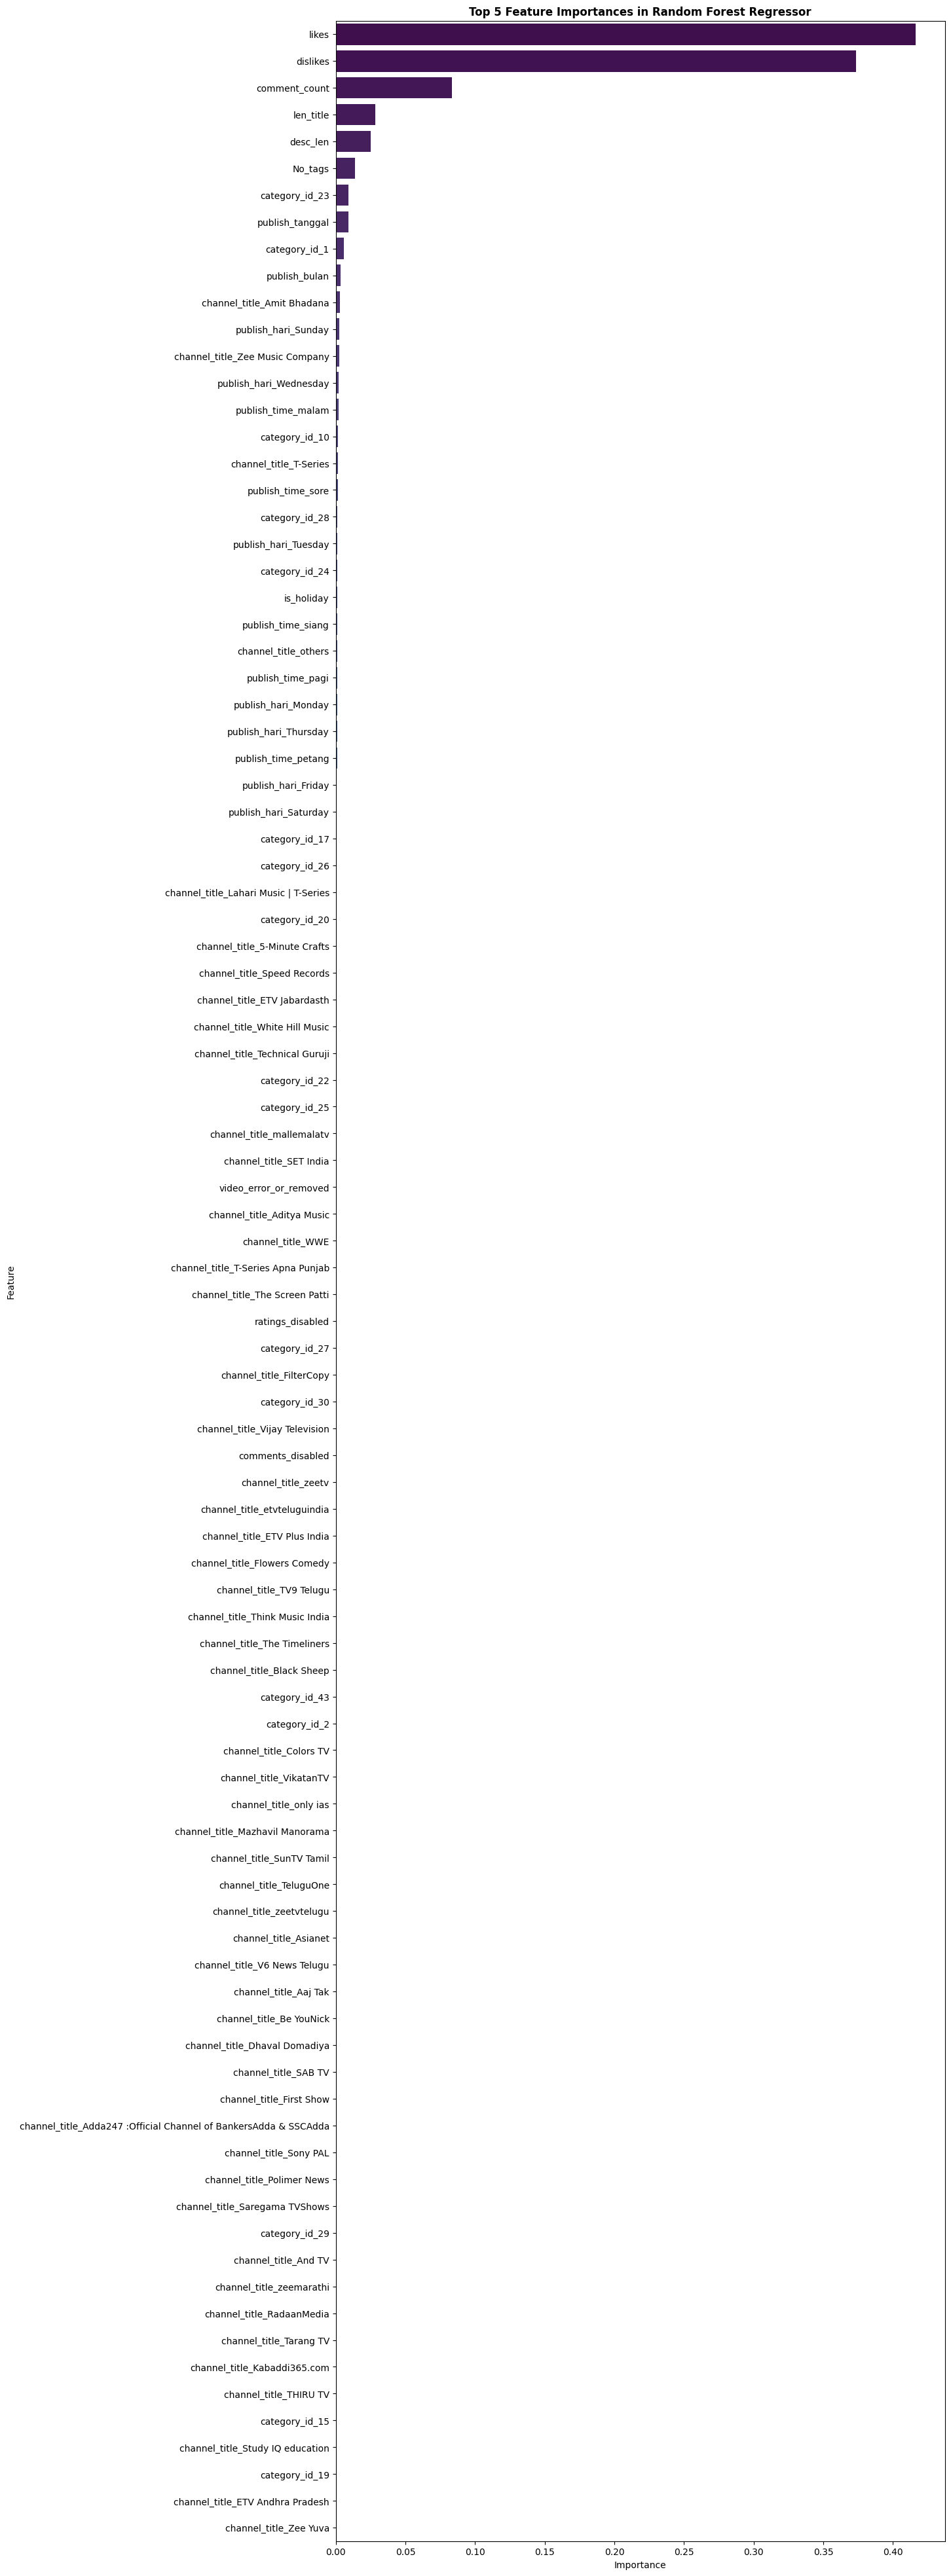

In [ ]:
# Extract feature importances
importances = rf_best_model.feature_importances_
feature_names = X_re_train.columns
importance_dict = dict(zip(feature_names, importances))
sorted_importance = sorted(importance_dict.items(), key=lambda x: x[1], reverse=True)

# Print
print("Top 5 Random Forest Feature Importances:")
for feature, importance in sorted_importance:
    print(f"{feature}: {importance:.4f}")

# Plot
importance_df = pd.DataFrame(sorted_importance, columns=['Feature', 'Importance'])

plt.figure(figsize=(12, 50))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Top 5 Feature Importances in Random Forest Regressor', weight='bold')
plt.show()

## E. Kesimpulan

Setelah melakukan proses modeling beserta dengan evaluasinya, kami memutuskan untuk menggunakan model Random Forest dengan alasan sebagai berikut:
* Memiliki nilai R^2 yang bagus, yaitu 0.9527. Angka tersebut hampir mendekati 1 yang berarti performa model kita sudah sangat bagus
* Memiliki sedikit kecenderungan untuk overfitting, karena nilai RMSE pada model random forest-nya adalah 634884
* Nilai tersebut cenderung lebih sedikit jika dibandingkan dengan model lainnya, namun juga tidak terlalu sedikit yang hingga mendekati 0, yang artinya pertanda yang bagus juga karena kecil kemungkinan untuk terjadinya overfitting
* Dan yang paling penting, model random forest termasuk salah satu model yang paling fleksibel, karena dia bisa digunakan untuk klasifikasi maupun regressi (seperti yang kita lakukan sekarang)
* Jadi, melihat feature importance kami merekomendasikan user / youtuber dari India untuk tidak memakai deskripsi atau judul yang terlalu panjang karena akan mempengaruhi views
* Likes & Dislikes secara intuitive termasuk fitur yang berpengaruh karena semakin banyak viewsnya maka akan semakin banyak juga likes atau dislikesnya.
* Channel & Category bukan merupakan fitur yang penting, sehingga youtuber India bisa mengabaikan aspek tersebut ketika ingin membuat video yang viewsnya banyak

